## Pavement Lyrics Analysis

In [1]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

from pandas import read_csv
from pandas import DataFrame

In [60]:
# import the lyrics to a dataframe
df = read_csv('pavement_lyrics.csv', encoding='utf-8')
df.head()

,album,lyrics,title,url
0,Unknown,Epileptic seizure in the back\nOf a red Capri ...,Birds In The Majic Industry,http://lyrics.fandom.com/wiki/Pavement:Birds_I...
1,Wowee Zowee (1995),Sunday drive past your own hall of fame\nIt's ...,Black Out,http://lyrics.fandom.com/wiki/Pavement:Black_Out
2,Westing (By Musket And Sextant) (1993),When they fall in\nThey fall in from the roof\...,Angel Carver Blues / Mellow Jazz Docent,http://lyrics.fandom.com/wiki/Pavement:Angel_C...
3,Terror Twilight (1999),The damage has been done\nI am not having fun ...,Ann Don't Cry,http://lyrics.fandom.com/wiki/Pavement:Ann_Don...
4,Wowee Zowee (1995),"Maybe someone's going to save me, my heart is ...",AT&T,http://lyrics.fandom.com/wiki/Pavement:AT%26T


#### Preprocess the lyrics

In [61]:
# convert to lower case
df['lyrics_clean'] = df['lyrics'].str.lower()
df['lyrics_clean'].head()

0    epileptic seizure in the back\nof a red capri ...
1    sunday drive past your own hall of fame\nit's ...
2    when they fall in\nthey fall in from the roof\...
3    the damage has been done\ni am not having fun ...
4    maybe someone's going to save me, my heart is ...
Name: lyrics_clean, dtype: object

In [62]:
# remove non-alpha characters
df['lyrics_clean'] = df['lyrics_clean'].str.replace(r'[^A-Za-z\s\']','')    # retain letters and apostrophes (contractions)
df['lyrics_clean'] = df['lyrics_clean'].str.replace(r'\s+',' ')    # replace multiple whitespaces with one space
df['lyrics_clean'].head()

0    epileptic seizure in the back of a red capri a...
1    sunday drive past your own hall of fame it's c...
2    when they fall in they fall in from the roof t...
3    the damage has been done i am not having fun a...
4    maybe someone's going to save me my heart is m...
Name: lyrics_clean, dtype: object

In [63]:
# tokenize the lyrics
# in this case, we'll tokenize using split() because we only want to split on whitespace to preserve contractions
#df['lyrics_tokens'] = [word_tokenize(lyrics) for lyrics in df['lyrics_clean']]
df['lyrics_tokens'] = df['lyrics_clean'].str.split()
df['lyrics_tokens'].head()

0    [epileptic, seizure, in, the, back, of, a, red...
1    [sunday, drive, past, your, own, hall, of, fam...
2    [when, they, fall, in, they, fall, in, from, t...
3    [the, damage, has, been, done, i, am, not, hav...
4    [maybe, someone's, going, to, save, me, my, he...
Name: lyrics_tokens, dtype: object

In [64]:
# remove stop words
from nltk import corpus
stop_words = set(corpus.stopwords.words('english'))
df['lyrics_tokens'] = [[w for w in wordlist if not w in stop_words] for wordlist in df['lyrics_tokens']]
df['lyrics_tokens'].head()

0    [epileptic, seizure, back, red, capri, tossing...
1    [sunday, drive, past, hall, fame, closed, week...
2    [fall, fall, roof, grab, tightly, knew, way, f...
3    [damage, done, fun, anymore, try, get, see, li...
4    [maybe, someone's, going, save, heart, made, g...
Name: lyrics_tokens, dtype: object

In [65]:
# in this case, we'll lemmatize the words instead of stemming

# stem words
#from nltk.stem import PorterStemmer    # general-purpose stemmer
#stemmer = PorterStemmer()
#df['lyrics_tokens'] = [[stemmer.stem(w) for w in wordlist] for wordlist in df['lyrics_tokens']]
#df['lyrics_tokens'].head()

In [66]:
# lemmatize words
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['lyrics_tokens'] = [[lemmatizer.lemmatize(w) for w in wordlist] for wordlist in df['lyrics_tokens']]
df['lyrics_tokens'].head()

0    [epileptic, seizure, back, red, capri, tossing...
1    [sunday, drive, past, hall, fame, closed, week...
2    [fall, fall, roof, grab, tightly, knew, way, f...
3    [damage, done, fun, anymore, try, get, see, li...
4    [maybe, someone's, going, save, heart, made, g...
Name: lyrics_tokens, dtype: object

In [67]:
# since words may be repeated in songs (e.g. repeated chorus), keep just the unique words per song
from numpy import array
from numpy import unique

df['lyrics_tokens'] = [unique(array(wordlist)) for wordlist in df['lyrics_tokens']]
df['lyrics_tokens'].head()

0    ['cause, ah, alarm, alley, apparitioner, away,...
1    ['til, across, actually, air, begin, bleed, bl...
2    [answer, ask, asked, care, everybody, fall, fi...
3    [aground, american, ann, anymore, away, believ...
4    [along, anything, away, back, balling, behind,...
Name: lyrics_tokens, dtype: object

#### Stack the words in a new dataframe

In [69]:
# reindex the original dataframe to ensure that the index is unique
# and make the index a song_id column
df.reset_index(inplace=True)
df.rename(columns = {'index' : 'song_id'}, inplace=True)
df.head()

,song_id,album,lyrics,title,url,lyrics_clean,lyrics_tokens
0,0,Unknown,Epileptic seizure in the back\nOf a red Capri ...,Birds In The Majic Industry,http://lyrics.fandom.com/wiki/Pavement:Birds_I...,epileptic seizure in the back of a red capri a...,"['cause, ah, alarm, alley, apparitioner, away,..."
1,1,Wowee Zowee (1995),Sunday drive past your own hall of fame\nIt's ...,Black Out,http://lyrics.fandom.com/wiki/Pavement:Black_Out,sunday drive past your own hall of fame it's c...,"['til, across, actually, air, begin, bleed, bl..."
2,2,Westing (By Musket And Sextant) (1993),When they fall in\nThey fall in from the roof\...,Angel Carver Blues / Mellow Jazz Docent,http://lyrics.fandom.com/wiki/Pavement:Angel_C...,when they fall in they fall in from the roof t...,"[answer, ask, asked, care, everybody, fall, fi..."
3,3,Terror Twilight (1999),The damage has been done\nI am not having fun ...,Ann Don't Cry,http://lyrics.fandom.com/wiki/Pavement:Ann_Don...,the damage has been done i am not having fun a...,"[aground, american, ann, anymore, away, believ..."
4,4,Wowee Zowee (1995),"Maybe someone's going to save me, my heart is ...",AT&T,http://lyrics.fandom.com/wiki/Pavement:AT%26T,maybe someone's going to save me my heart is m...,"[along, anything, away, back, balling, behind,..."


In [77]:
# create a new dataframe with the words split into rows, using the song_id
df_words = DataFrame(df.lyrics_tokens.tolist(), index=df.song_id).stack()
df_words.head()
# the dataframe now has a multiindex (song ID, word within song)

song_id   
0        0          'cause
         1              ah
         2           alarm
         3           alley
         4    apparitioner
dtype: object

In [78]:
# make song ID a column and rename the fields
df_words = df_words.reset_index(['song_id', 0])
df_words.rename(columns = {0 : 'word'}, inplace=True)
df_words.head()

,song_id,word
0,0,'cause
1,0,ah
2,0,alarm
3,0,alley
4,0,apparitioner


In [79]:
# join back to the original dataset to get the song information
df_words = df_words.merge(df[['song_id','album','title']], how='inner', on='song_id')
df_words.head()

,song_id,word,album,title
0,0,'cause,Unknown,Birds In The Majic Industry
1,0,ah,Unknown,Birds In The Majic Industry
2,0,alarm,Unknown,Birds In The Majic Industry
3,0,alley,Unknown,Birds In The Majic Industry
4,0,apparitioner,Unknown,Birds In The Majic Industry


#### Unigram counts

In [80]:
# count songs by word
df_counts = df_words.groupby(['word']).count()
df_counts.sort_values(by=['song_id'], ascending=False, inplace=True)
df_counts.head()

,song_id,album,title
word,,,
know,58,58,58
like,58,58,58
i'm,58,58,58
got,54,54,54
one,47,47,47


In [81]:
df_counts['song_id'][0:9].tolist()

[58, 58, 58, 54, 47, 44, 42, 37, 37]

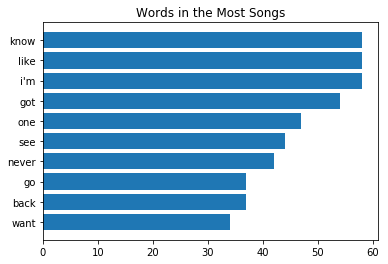

In [82]:
# chart the top 10 words
from numpy import arange
import matplotlib.pyplot as plt
 
# make an array with the list of y positions
y_pos = arange(10)
 
# Create horizontal bars
plt.barh(y_pos, df_counts['song_id'][0:10].tolist()[::-1])
 
# Create names on the y-axis
plt.yticks(y_pos, df_counts.index[0:10].tolist()[::-1])

# add a title
plt.title("Words Occurring in the Most Songs")

# Show graphic
plt.show()


In [84]:
# songs that contain "know"
df_words[df_words['word']=='know']

,song_id,word,album,title
109,1,know,Wowee Zowee (1995),Black Out
196,3,know,Terror Twilight (1999),Ann Don't Cry
371,6,know,Wowee Zowee (1995),Best Friend's Arm
558,9,know,Wowee Zowee (1995),Black Out
641,11,know,Brighten The Corners (1997),Blue Hawaiian
691,12,know,Westing (By Musket And Sextant) (1993),Box Elder
744,13,know,Rattled By La Rush (1995),Brink Of The Clouds
827,15,know,Unknown,Camera
910,16,know,Terror Twilight (1999),Carrot Rope
991,17,know,Shady Lane (1997),Cherry Area


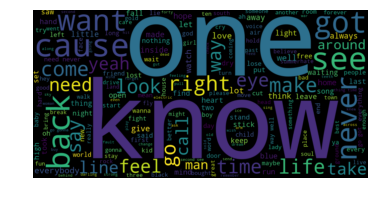

In [83]:
# plot a word cloud
from wordcloud import WordCloud
 
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=500, margin=0).generate(' '.join(df_words['word'].tolist()))
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
# tf-idf

In [ ]:
# remove Spiral Stairs songs

In [ ]:
# break into sounds - which are the most Malkmusian sounds?